![](Images/intro-1625185676.webp)


# House Sales Analysis

**Authors:** Volha Puzikava
***

## Overview

This project analyzes house sales in a northwestern county in order to develop a pricing algorithm that can help real estate agencies and homeowners to sell houses. 
***

## Business Problem

The XYZ Realty asked to analyze the King County House Sales dataset and provide advice about how the number of floors in homes might increase or decrease the estimated value of those homes, and by what amount. The main purpose of the analysis was to create an algorithm that would predict the best price for selling homes based on the known characteristics of those houses.
***

## Data Understanding

The data for the analysis was taken from the King County House Sales dataset. The data provided various information about house sales: unique identifiers for houses, dates homes were sold, sale prices, number of bedrooms and bathrooms the houses had, square footage of living space in the houses, square footage of the lots, etc. The dataset contained 21,596 houses sold from 2014 to 2015 in the King County, Washington.

In [173]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [174]:
# Load the dataset and inspect the head to make sure everything loaded correctly
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


***

## Data Preparation

The dataframe was checked for the presence of any NaNs. In the "waterfront" and "view" columns all null values were replaced with the string "Unknown" to indicate real categories. The "yr_renovated" column had NaNs replaced with its median.

In [175]:
# Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [176]:
# Check for the unique values inside the columns with null values
print(df['waterfront'].unique())
print(df['view'].unique())
print(df['yr_renovated'].unique())

[nan 'NO' 'YES']
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [177]:
# Replace NaN values with "Unknown" to indicate that this is a real category
df['waterfront'] = df['waterfront'].replace(np.nan, 'Unknown')
df['waterfront'].value_counts()

NO         19075
Unknown     2376
YES          146
Name: waterfront, dtype: int64

In [178]:
# Replace NaN values with "Unknown" to indicate that this is a real category
df['view'] = df['view'].replace(np.nan, 'Unknown')
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Unknown         63
Name: view, dtype: int64

In [179]:
# Fill in the NaN values with median 
df['yr_renovated'] = df['yr_renovated'].replace(np.nan, 0)
# Check if there are any NaN values left
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The "sqft_basement" column contained "?" values. After examining the description of the column names and data in those columns, it was found out that square footage of the living space in the home ("sqft_living") was equal to the sum of square footage of that house apart from basement ("sqft_above") and square footage of the basement in the house ("sqft_basement"). Thus, "?" values in the "sqft_basement" column were replaced with the appropriate measurements. Besides, the format of the "sqft_basement" and "zipcode" columns were converted to float and string types respectively.

In [180]:
display(df['sqft_basement'].unique()[:5])
# Fill in "?" values and convert the column into a float type
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)
# Convert the column into the string type
df['zipcode'] = df['zipcode'].astype(str)
# Check the data types of all columns
df.dtypes

array(['0.0', '400.0', '910.0', '1530.0', '?'], dtype=object)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In order to be used in a model, categorical variables had to be transformed. Because the values of the categorical variables were ordinal, i.e. they represented some kind of intensity, a map that reflected each value to a number was created. The transformation of the "waterfront", "view", "condition", and "grade" columns are reflected below:

In [181]:
# Transform the categorical variables into numerical using mapping
waterfront = {
    'NO' : 0,
    'YES' : 1,
    'Unknown' : 2
}
waterfront_data = df['waterfront'].map(waterfront)

view = {
    'NONE' : 0,
    'FAIR' : 1,
    'AVERAGE' : 2,
    'GOOD' : 3,
    'EXCELLENT' : 4,
    'Unknown' : 5
}
view_data = df['view'].map(view)

condition = {
    'Poor' : 1,
    'Fair' : 2,
    'Average' : 3,
    'Good' : 4,
    'Very Good' : 5
}
condition_data = df['condition'].map(condition)

grade = {
    '3 Poor' : 1,
    '4 Low' : 2,
    '5 Fair' : 3,
    '6 Low Average' : 4,
    '7 Average' : 5,
    '8 Good' : 6,
    '9 Better' : 7,
    '10 Very Good' : 8,
    '11 Excellent' : 9,
    '12 Luxury' : 10,
    '13 Mansion' : 11
}
grade_data = df['grade'].map(grade)

In [182]:
# Deliver the transformed data into the dataframe
new_df = df.copy()
new_df['waterfront'] = waterfront_data
new_df['view'] = view_data
new_df['condition'] = condition_data
new_df['grade'] = grade_data

In [183]:
# Check the transformed dataframe
new_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2,0,...,5,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,5,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,4,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,6,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


***

## Data Exploration


In [184]:
# Describe the dataset using 5-point statistics
new_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.226791,0.247766,3.409825,5.657915,1788.596842,291.725008,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.628813,0.806622,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,5.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,5.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,6.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2.000000,5.000000,5.000000,11.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


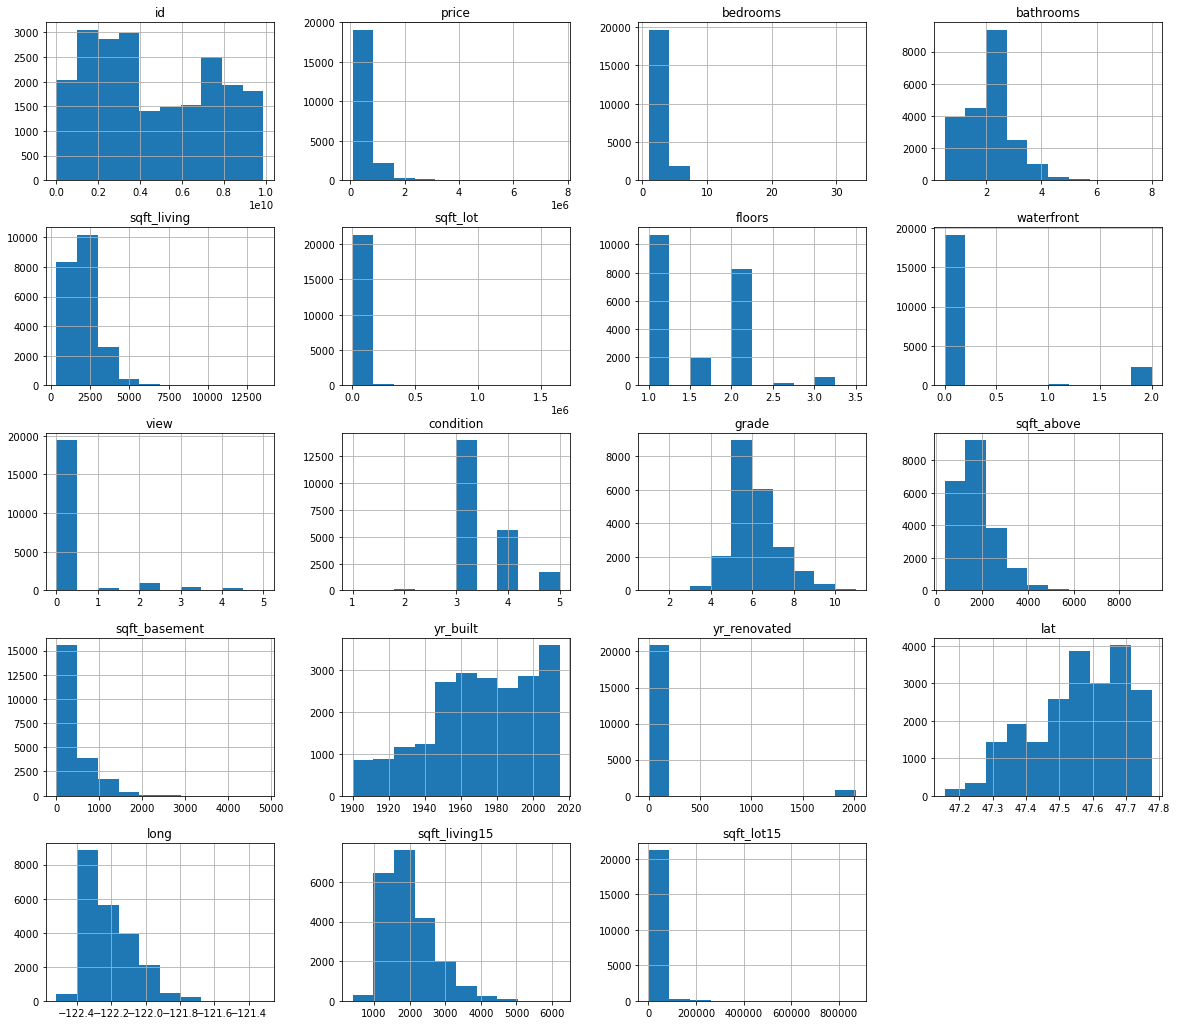

In [185]:
# Plot histograms of all the numeric variables in the dataset
new_df.hist(figsize = (20, 18));

Most of the resulted distributions appeared to be skewed. While linear regression does not assume that each of the individual predictors should be normally distributed, it does assume a linear relationship between the predictors and the target variable ("price"). In order to investigate if this assumption held true, single variable regression plots of each feature were plotted against the target variable using seaborn.

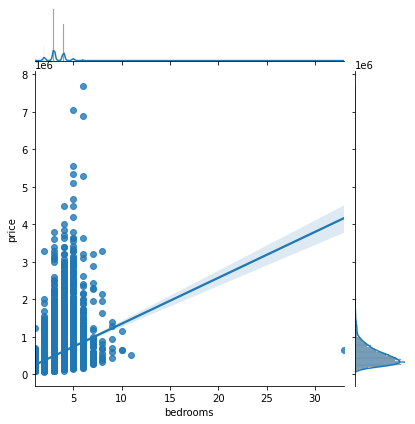

In [186]:
import warnings
warnings.filterwarnings('ignore')
# Check if the target variable is linearly related to the input features
sns.jointplot('bedrooms', 'price', data = new_df, kind = 'reg');

There seemed to be a linear relationship between number of bedrooms and price of the house, however, the relationship looked noisy.

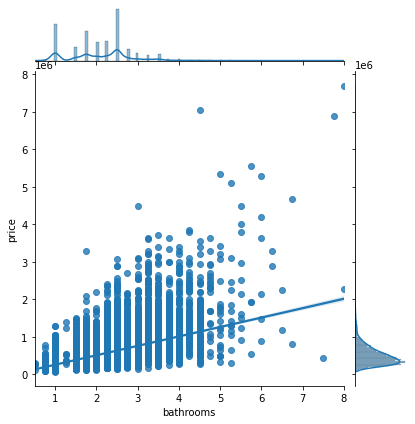

In [187]:
sns.jointplot('bathrooms', 'price', data = new_df, kind = 'reg');

There was a linear relationship between number of bathrooms and price of the house.

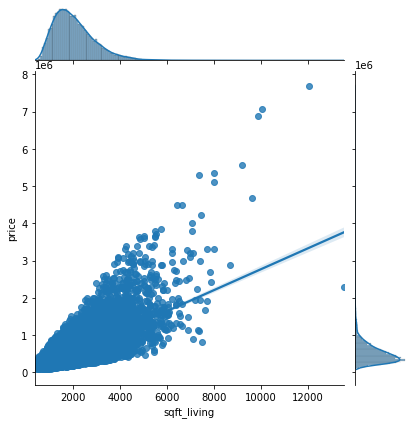

In [188]:
sns.jointplot('sqft_living', 'price', data = new_df, kind = 'reg');

The linear relationship between "price" and "sqft_living" existed.

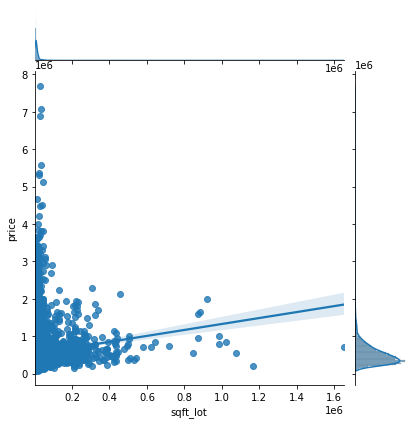

In [189]:
sns.jointplot('sqft_lot', 'price', data = new_df, kind = 'reg');

There seemed to be a linear relation between "sqft_lot" and target, however, with a lot of noise.

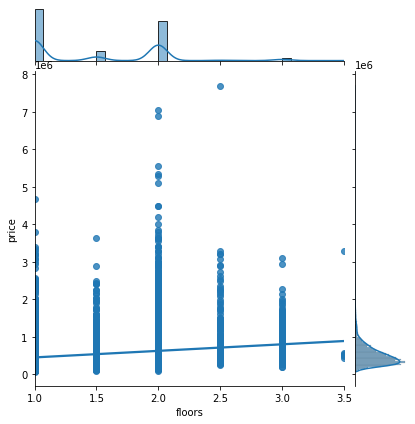

In [190]:
sns.jointplot('floors', 'price', data = new_df, kind = 'reg');

It didn't seem to be much of a linear relation between the number of floors and price of the house.

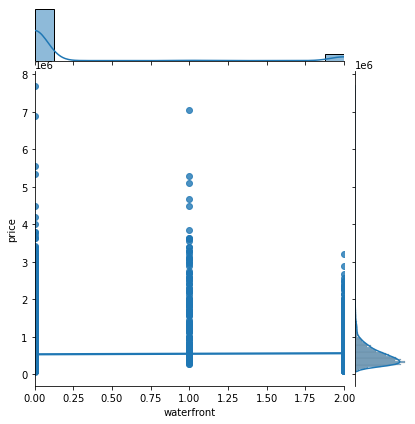

In [191]:
sns.jointplot('waterfront', 'price', data = new_df, kind = 'reg');

No linear relation existed between "price" and "waterfront".

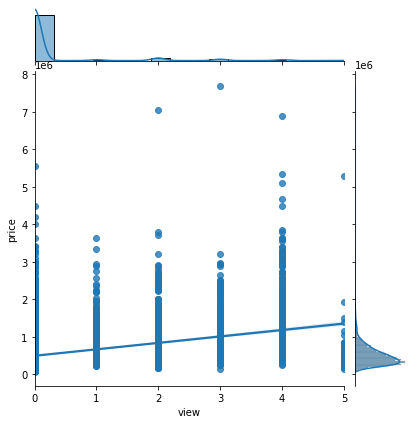

In [192]:
sns.jointplot('view', 'price', data = new_df, kind = 'reg');

It didn't seem to be much of a linear relation between view and price of the house.

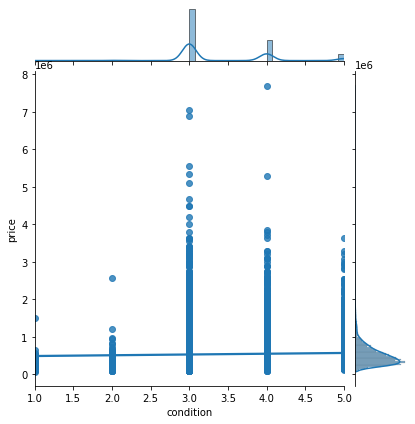

In [193]:
sns.jointplot('condition', 'price', data = new_df, kind = 'reg');

No linear relation existed between condition of the house and its price.

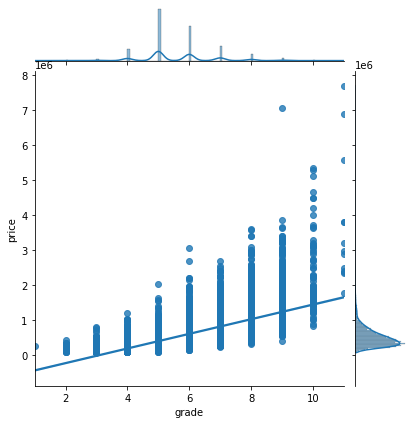

In [194]:
sns.jointplot('grade', 'price', data = new_df, kind = 'reg');

There was a linear relation between grade and price of the house.

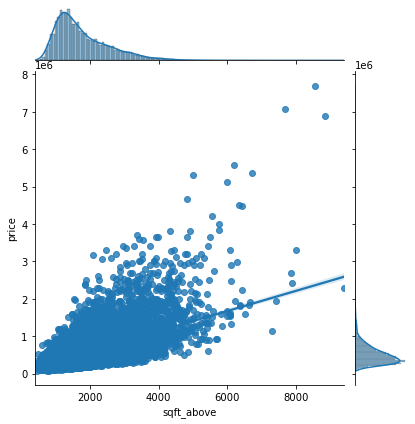

In [195]:
sns.jointplot('sqft_above', 'price', data = new_df, kind = 'reg');

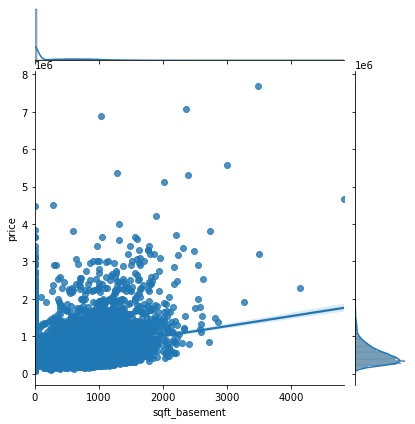

In [196]:
sns.jointplot('sqft_basement', 'price', data = new_df, kind = 'reg');

There was a linear relation between "price" and "sqft_above" as well as "price" and "sqft_basement".

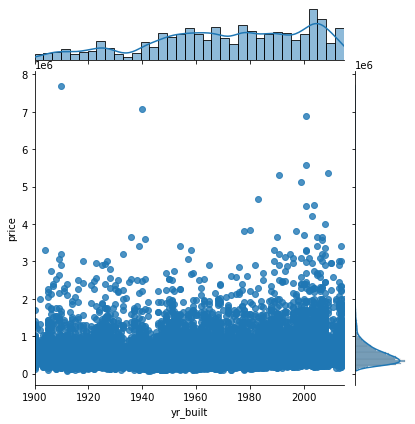

In [197]:
sns.jointplot('yr_built', 'price', data = new_df, kind = 'reg');

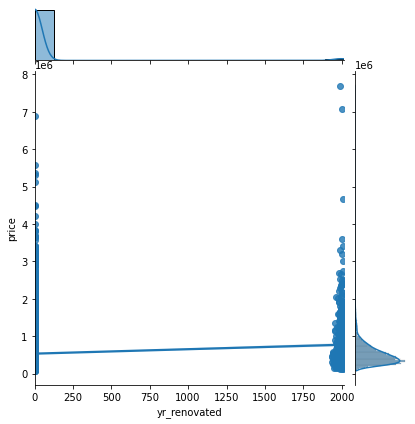

In [198]:
sns.jointplot('yr_renovated', 'price', data = new_df, kind = 'reg');

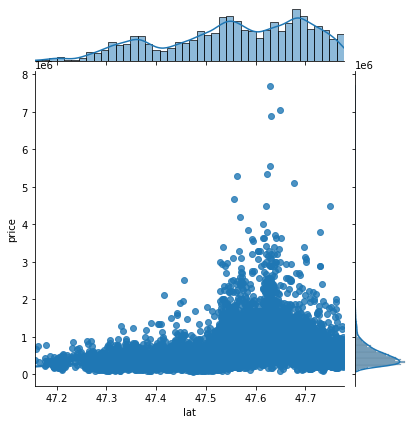

In [199]:
sns.jointplot('lat', 'price', data = new_df, kind = 'reg');

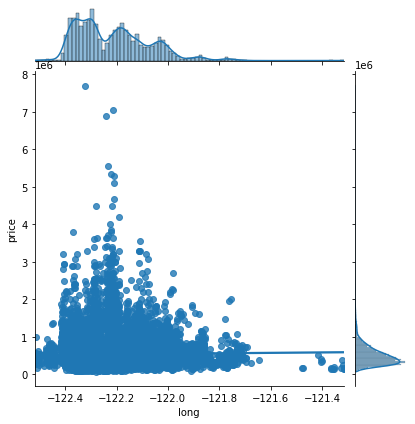

In [200]:
sns.jointplot('long', 'price', data = new_df, kind = 'reg');

There was no linear relation between price and year the house was built, price and year the house was renovated, price and longitute, and price and latitude.

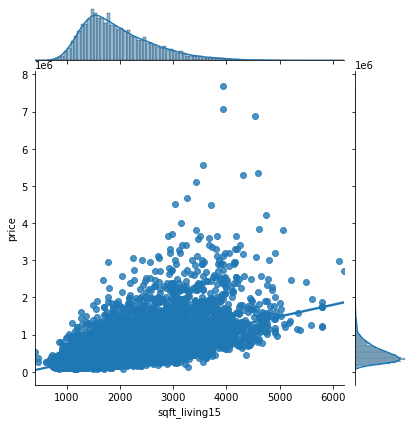

In [201]:
sns.jointplot('sqft_living15', 'price', data = new_df, kind = 'reg');

There was a linear relationship between "price" and "sqft_living15" variables.

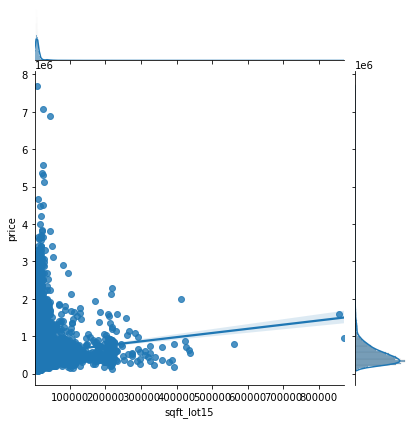

In [202]:
sns.jointplot('sqft_lot15', 'price', data = new_df, kind = 'reg');

There was a linear relation between "price" and "sqft_lot15", however, that relation was noisy.

Thus, the linear relation was not seen between the target and the following predictors: "waterfront", "condition", "yr_built", "yr_renovated", "lat", and "long".

It was also important to see if the predictive features would result in multicollinearity in the final model. With that in mind, pearson correlation coefficients of the predictive features were generated and visualized.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.012107,0.007128,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.010612,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.024092,0.377052,0.036056,0.667951,0.605368,0.323799,0.053953,0.117855,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.004685,0.075360,0.026496,0.356563,0.479386,0.302808,0.155670,0.017900,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.003704,0.177257,-0.126479,0.665838,0.686668,0.283440,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.007164,0.270390,-0.059445,0.762779,0.876448,0.435130,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.004550,0.072466,-0.008830,0.114731,0.184139,0.015418,0.052946,0.004979,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.002195,0.026602,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.003793,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.012107,0.024092,-0.004685,0.003704,0.007164,0.004550,-0.002195,1.000000,0.056277,0.001548,0.003234,-0.000117,0.015076,-0.007058,0.017801,0.001881,-0.003697,0.007802,-0.001029
view,0.007128,0.377052,0.075360,0.177257,0.270390,0.072466,0.026602,0.056277,1.000000,0.044212,0.238710,0.157676,0.265952,-0.052167,0.083798,0.002123,-0.075156,0.267312,0.070915
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.001548,0.044212,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.055808,-0.015102,-0.105877,-0.093072,-0.003126


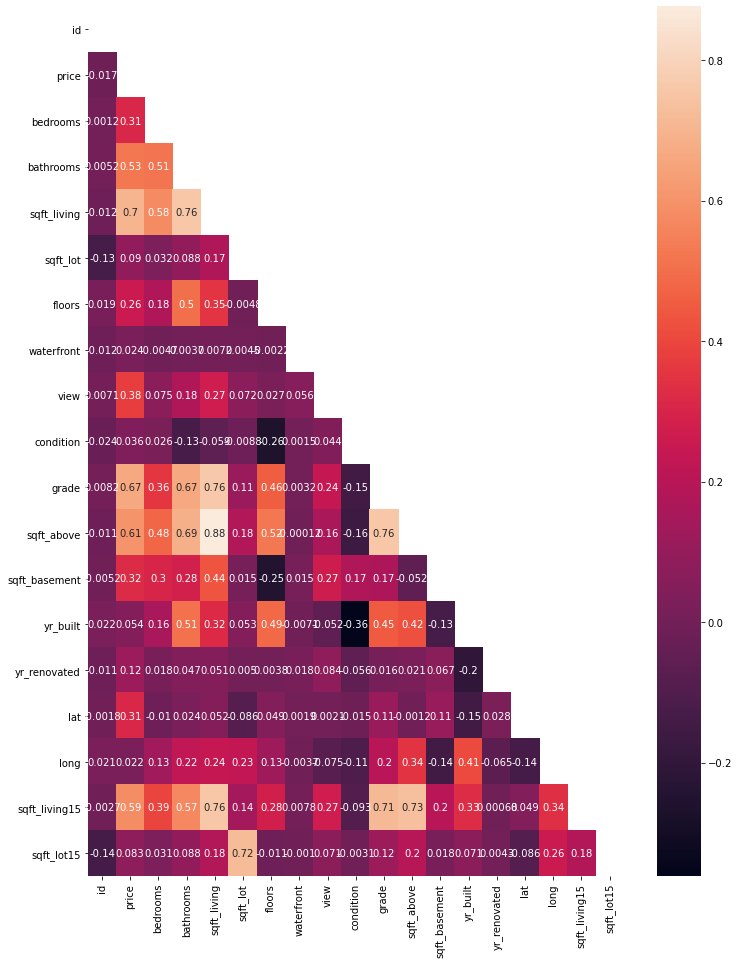

In [203]:
# Generate the pearson correlation coefficients
corr = new_df.corr()
display(corr)
# Visualize the coefficients
fig, ax = plt.subplots(figsize = (12, 16))
sns.heatmap(data = corr, 
            mask = np.triu(np.ones_like(corr, dtype = bool)), 
            ax = ax, 
            annot = True);

According to the heatmap, the highest correlation belonged to "sqft_living" and "sqft_above" (0.88). Also, "sqft_living" was most strognly correlated with the target variable (0.7). Strong correlation was also present between "sqft_living" and "sqft_living15" (0.76), "sqft_living" and "grade" (0.76), "sqft_living" and "bathrooms" (0.76), "sqft_lot" and "sqft_lot15" (0.72).
***

## Data Modeling

In order to build a regression model, a train-test split should be performed. The prediction target for this analysis was the price of the houses, so the data was separated into a train set and test set accordingly. The "id" column was dropped since it represented a unique identifier, not an actual numeric feature.

In [204]:
# Import necessary libraries
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [205]:
# Define the target and predictors
y = new_df['price']
X = new_df.select_dtypes('number').copy()
# Drop "id" column 
X = X.drop(['id', 'price'], axis = 1)

In [206]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

16197 16197 5400 5400


The heatmap was generated to check for multicollinearity in the train set.

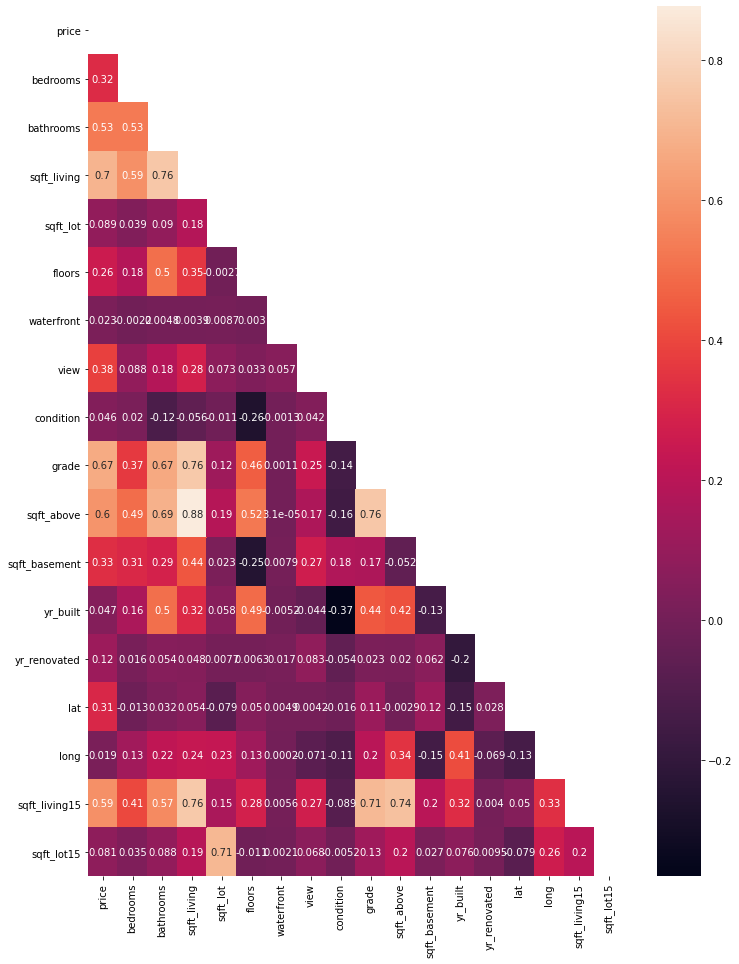

In [207]:
# Compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis = 1)
corr = heatmap_data.corr()
# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize = (12, 16))
sns.heatmap(data = corr, 
            mask = np.triu(np.ones_like(corr, dtype = bool)), 
            ax = ax, 
            annot = True);

According to the heatmap, the most correlated variable with the target was "sqft_living". That feature was used to build a linear regression model, that was used as the baseline model. The baseline model was then evaluated using cross_validate and ShuffleSplit, the main idea of which was to perform 3 separate train-test splits within the X_train and y_train, and find the average scores for each.

Also, the high correlation was again seen on the heatmap between "sqft_living" and "sqft_above" (0.88), "sqft_living" and "sqft_living15" (0.76), "sqft_living" and "grade" (0.76), "sqft_living" and "bathrooms" (0.76), "sqft_lot" and "sqft_lot15" (0.71).

In [208]:
# Build a linear regression model, which serves as a baseline model
from sklearn.linear_model import LinearRegression
baseline_model = LinearRegression()

In [209]:
# Evaluate the model using cross_validation and ShuffleSplit
from sklearn.model_selection import cross_validate, ShuffleSplit
splitter = ShuffleSplit(n_splits = 3, test_size = 0.25, random_state = 0)
baseline_scores = cross_validate(
    estimator = baseline_model,
    X = X_train[['sqft_living']],
    y = y_train,
    return_train_score = True,
    cv = splitter
)
print("Train score baseline model:", baseline_scores['train_score'].mean())
print("Validation score baseline model:", baseline_scores['test_score'].mean())

Train score baseline model: 0.4895269677689762
Validation score baseline model: 0.4935530672243642


The resulted scores represented R-squares for train and test models. Each R-square is the amount of variance of the house price that is explained by the square footage of the living space in those houses. The model didn't seem to be strong enough, so it was run in StatsModels to check the p-value.

In [210]:
# Fit the baseline model and check for p_values
sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        06:06:35   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As the p-value of the baseline model looked good, but the R-square was low enough, the second model was created. As the predictors with overly high pairwise-correlation (over 0.65) are almost certain to produce multicollinearity in the final models, the columns "sqft_above", "sqft_living15", "sqft_lot15", "grade", and "bathrooms" were dropped. The columns "waterfront", "condition", "yr_built", "yr_renovated", "lat", and "long" were not included either because of the absence of the linearity assumption with the target variable.

In [211]:
# Create a second model without irrelevant columns
X_train_second_model = X_train.drop(['bathrooms', 'grade', 'sqft_above',
                                     'sqft_living15', 'sqft_lot15', 'waterfront',
                                     'condition', 'yr_built', 'yr_renovated',
                                     'lat', 'long'], axis = 1)

In [212]:
# Evaluate a model
second_model = LinearRegression()
second_model_scores = cross_validate(
    estimator = second_model,
    X = X_train_second_model,
    y = y_train,
    return_train_score = True,
    cv = splitter
)
print("Train score second model:", second_model_scores['train_score'].mean())
print("Validation score second model:", second_model_scores['test_score'].mean())

Train score second model: 0.5425876973483873
Validation score second model: 0.5399595988729583


The train and validation scores got better compared to the scores of the baseline model. However, the model was rerun in StatsModels to check the p-values of the predictors.

In [213]:
# Fit the model
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3195.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        06:07:56   Log-Likelihood:            -2.2416e+05
No. Observations:               16197   AIC:                         4.483e+05
Df Residuals:                   16190   BIC:                         4.484e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.981e+04   8756.084      9.115      0.000    6.26e+04     9.7e+04
bedrooms      -5.291e+04   2707.603    -19.543      0.000   -5.82e+04   -4.76e+04
sqft_living     287.8120      3.303     87.136      0.000     281.338     294.286
sqft_lot         -0.4687      0.049     -9.519      0.000      -0.565      -0.372
floors         1.558e+04   4415.173      3.528      0.000    6923.444    2.42e+04
view           8.797e+04   2563.398     34.317      0.000    8.29e+04     9.3e+04
sqft_basement     7.8074      5.675      1.376      0.169      -3.316      18.931
==============================================================================
Omnibus:                     9666.940   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260712.753
Skew:                           2.386   Prob(JB):                         0.00
Kurtosis:                      22.067   Cond. No.                     2.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the summary above, "sqft_basement" was not statistically significant, since its p-value was higher than 0.05. Thus, the third model was created, in which the column with square footage of the basements was dropped. The third model was then rerun in StatsModels to check the p-values again and evaluated using cross_validate and ShuffleSplit.

In [214]:
# Create a third model without irrelevant column
X_train_third_model = X_train_second_model.drop(['sqft_basement'], axis = 1)

In [215]:
# Fit the model
sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3833.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        06:08:23   Log-Likelihood:            -2.2416e+05
No. Observations:               16197   AIC:                         4.483e+05
Df Residuals:                   16191   BIC:                         4.484e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.134e+04   8684.891      9.366      0.000    6.43e+04    9.84e+04
bedrooms    -5.266e+04   2701.228    -19.494      0.000    -5.8e+04   -4.74e+04
sqft_living   289.8275      2.960     97.901      0.000     284.025     295.630
sqft_lot       -0.4762      0.049     -9.731      0.000      -0.572      -0.380
floors       1.267e+04   3878.163      3.268      0.001    5072.506    2.03e+04
view         8.854e+04   2529.625     35.001      0.000    8.36e+04    9.35e+04
==============================================================================
Omnibus:                     9664.534   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260618.356
Skew:                           2.385   Prob(JB):                         0.00
Kurtosis:                      22.064   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
# Evaluate the model
third_model = LinearRegression()
third_model_scores = cross_validate(
    estimator = third_model,
    X = X_train_third_model,
    y = y_train,
    return_train_score = True,
    cv = splitter
)
print("Train score baseline model:", baseline_scores['train_score'].mean())
print("Validation score baseline model:", baseline_scores['test_score'].mean())
print("Train score second model:", second_model_scores['train_score'].mean())
print("Validation score second model:", second_model_scores['test_score'].mean())
print("Train score third model:", third_model_scores['train_score'].mean())
print("Validation score third model:", third_model_scores['test_score'].mean())

Train score baseline model: 0.4895269677689762
Validation score baseline model: 0.4935530672243642
Train score second model: 0.5425876973483873
Validation score second model: 0.5399595988729583
Train score third model: 0.5425362710605897
Validation score third model: 0.5399735455384458


The removal of the feature with high p-value didn't influence much on the resulting scores. The RFECV was used to select the best features. "RFE" ("recursive feature elimination") repeatedly scores the model, finds and removes the features with the lowest "importance" until the minimum is reached.

In [217]:
# Select the best features with sklearn.feature_selecting
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
# Scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_third_model)
model_for_RFECV = LinearRegression()
# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv = splitter)
selector.fit(X_train_for_RFECV, y_train)
print("Was the column selected?")
for index, col in enumerate(X_train_third_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
sqft_living: True
sqft_lot: True
floors: True
view: True


The resulted algorithm stated that the third model was the best one. A different strategy was applied to see if a better model could be found. The code below went over multiple different permutations of the columns to see if we could find something better than p-values approach or the RFECV approach.

In [218]:
# Use brute force approach
from itertools import combinations

features = ['bedrooms', 'sqft_living', 'sqft_lot',
            'floors', 'view']
# Make a dataframe to hold the results
results_df = pd.DataFrame(columns = features)
results_df = results_df.append({
    'train_score': baseline_scores['train_score'].mean(),
    'val_score': baseline_scores['test_score'].mean()
}, ignore_index = True)

for feature in features[1:]:
    scores = cross_validate(
        estimator = third_model,
        X = X_train[['sqft_living', feature]],
        y = y_train,
        return_train_score = True,
        cv = splitter
    )
    
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index = True)

for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator = third_model,
        X = X_train[["sqft_living", feature1, feature2]],
        y = y_train,
        return_train_score = True,
        cv = splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index = True)

results_df = results_df.append({
    "bedrooms": "Yes", "sqft_lot": "Yes",
    "floors": "Yes", "view": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index = True)   

results_df["sqft_living"] = 'Yes'
results_df.fillna("No", inplace = True)

results_df

,bedrooms,sqft_living,sqft_lot,floors,view,train_score,val_score
0,No,Yes,No,No,No,0.489527,0.493553
1,No,Yes,No,No,No,0.489525,0.493539
2,No,Yes,Yes,No,No,0.490934,0.495451
3,No,Yes,No,Yes,No,0.489643,0.493642
4,No,Yes,No,No,Yes,0.529097,0.527670
5,No,Yes,Yes,No,No,0.490934,0.495451
6,No,Yes,No,Yes,No,0.489638,0.493625
7,No,Yes,No,No,Yes,0.529097,0.527663
8,No,Yes,Yes,Yes,No,0.491005,0.495432
9,No,Yes,Yes,No,Yes,0.530901,0.529948


According to the results of the Brute Force Approach, the best model happened to be our third model. A list of best_features, which contained the names of the best model features based on the findings, was created, and the data was prepared for modeling. LinearRegression model called final_model was instantiated, then fitted on the training data and scored on the test data.

In [219]:
# Prepare the data for modeling
best_features = ['bedrooms', 'sqft_living', 'sqft_lot',
                 'floors', 'view']
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In [220]:
# Fit the training data and score it on the test data
final_model = LinearRegression()
final_model.fit(X_train_final, y_train)
final_model.score(X_test_final, y_test)

0.54446106792736

In [221]:
# Display the coefficients and intercept of the final model
print(pd.Series(final_model.coef_, index = X_train_final.columns, name = 'Coefficient'))
print()
print("Intercept:", final_model.intercept_)

bedrooms      -52656.875862
sqft_living      289.827538
sqft_lot          -0.476180
floors         12674.134496
view           88539.650887
Name: Coefficient, dtype: float64

Intercept: 81343.26419133542


According to the resulted model, the base price for a house in the King County (the model intercept) is about 81,343.26. Then for each additional bedroom in the house the price goes down by 52,656.88 per bedroom. For every square footage of living space in the home, the price goes up by 289.83, and for every square footage of the lot, the price goes down by 0.48. The number of floors increases the price of the house by about 12,674.13 per floor. Then finally the quality of view from the house increases its price by 88,539.65 per numerical value of the feature. 

But before assuming the resulted coefficients gave the inferential insight into the pricing algorithm, the assumptions of linear regression should be investigated, in order to understand how much the final model violated those assumptions.

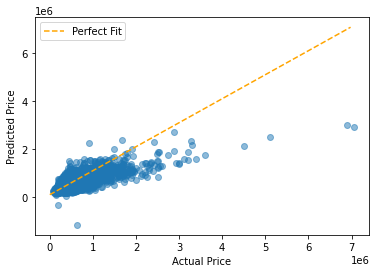

In [222]:
# Investigate linearity
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle = "--", color = 'orange', label = 'Perfect Fit')
ax.scatter(y_test, preds, alpha = 0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

There were some outliers, but the model followed linear regression.

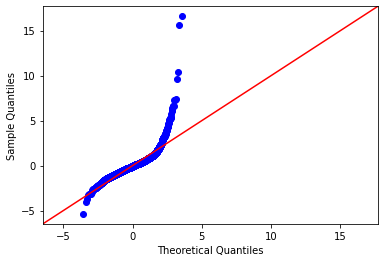

In [223]:
# Investigate normality
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True);

The normality assumption was violated.

In [224]:
# Investigate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range (X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms       12.508544
sqft_living    11.687717
sqft_lot        1.183440
floors          7.510675
view            1.203572
Name: Variance Inflation Factor, dtype: float64

The "rule of thumb" that variance inflation factor should be less than 5 was not followed. Some of the factors were much higher than 5. Thus, there was very strong multicollinearity in the final model and the regression coefficients were poorly estimated.

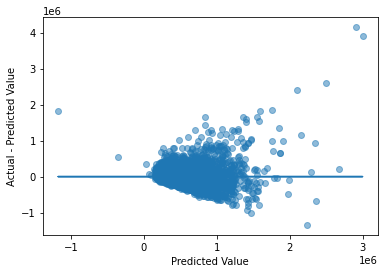

In [225]:
# Check for homoscedasticity
fig, ax = plt.subplots()
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

The resulted scatter plot had a "funnel" shape and, thus, signs of heteroscedaticity showed up: errors appeared to increase as the price of the houses incresed.

Based on the above plots, it seemed as though outliers were having a substantial impact on the model. The target variable was checked for outliers.

<AxesSubplot:>

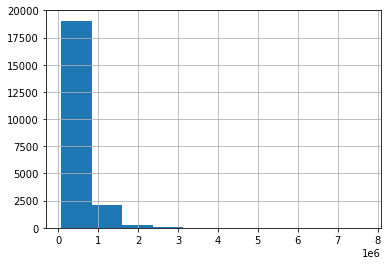

In [226]:
# Check for outliers
new_df.price.hist()

<AxesSubplot:xlabel='price'>

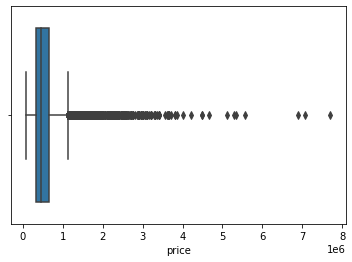

In [227]:
sns.boxplot(x=new_df['price'])

Since the distribution was skewed, Inter-Quartile Range (IQR) proximity rule was used for outliers detection. The rule states that the data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers, where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range, given by (Q3–Q1). Thus, the boundary values were found and outliers were excluded from the analysis. As a result, 1,158 rows were not included into the analysis.

In [228]:
# Find the IQR and boundary values
IQR = new_df.price.quantile(0.75) - new_df.price.quantile(0.25)
print("Highest allowed",new_df.price.quantile(0.75) + 1.5*IQR)
print("Lowest allowed",new_df.price.quantile(0.25) - 1.5*IQR)

Highest allowed 1129500.0
Lowest allowed -162500.0


In [229]:
# Trim the dataset and create a new without outliers
new_df1 = new_df[new_df['price'] < 1129500.0]
new_df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2,0,...,5,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,5,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,4,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,6,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

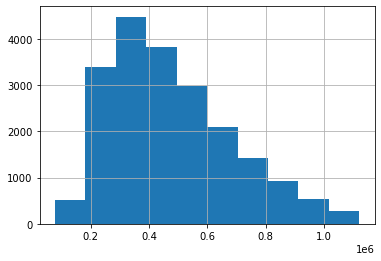

In [230]:
# Compare the plots after trimming
new_df1.price.hist()

<AxesSubplot:xlabel='price'>

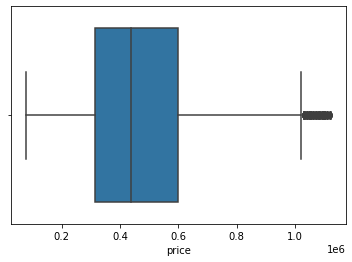

In [231]:
sns.boxplot(x=new_df1['price'])

Once the outliers were removed, the new DataFrame was split into train and test sets. LinearRegression model called final_model was instantiated using the best_features, then fitted on the training data and scored on the test data. The linear regression assumptions were then checked on the resulted model without outliers.

In [232]:
# Define the target and predictors
y = new_df1['price']
X = new_df1.select_dtypes('number').copy()
# Drop "id" column 
X = X.drop(['id', 'price'], axis = 1)

In [233]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

15329 15329 5110 5110


In [234]:
# Prepare the data for modeling
best_features = ['bedrooms', 'sqft_living', 'sqft_lot',
                 'floors', 'view']
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]
# Fit the training data and score it on the test data
final_model = LinearRegression()
final_model.fit(X_train_final, y_train)
final_model.score(X_test_final, y_test)

0.4078375343581252

In [235]:
# Display the coefficients and intercept of the final model
print(pd.Series(final_model.coef_, index = X_train_final.columns, name = 'Coefficient'))
print()
print("Intercept:", final_model.intercept_)

bedrooms      -19471.745393
sqft_living      169.469385
sqft_lot          -0.068235
floors         28078.200381
view           35565.040859
Name: Coefficient, dtype: float64

Intercept: 159255.42653631978


After removing the outliers, the resulted model had the following features: the base price for a house in the King County is about 159,255.43. Then for each additional bedroom in the house the price goes down by 19,471.75 per bedroom. For every square footage of living space in the home, the price goes up by 169.47, and for every square footage of the lot, the price goes down by 0.07. The number of floors increases the price of the house by about 28,078.20 per floor. Then finally the quality of view from the house increases its price by 35,565.04 per numerical value of the feature. 

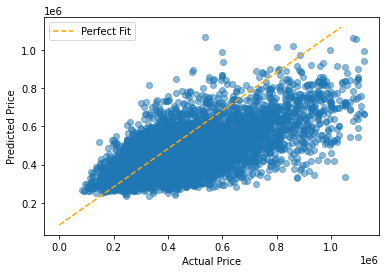

In [236]:
# Investigate linearity
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle = "--", color = 'orange', label = 'Perfect Fit')
ax.scatter(y_test, preds, alpha = 0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

The model followed linear regression.

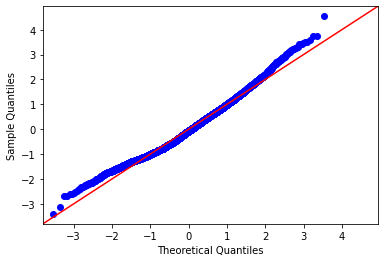

In [237]:
# Investigate normality
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True);

The plot looked much better, the normality assumption was followed.

In [238]:
# Investigate multicollinearity
vif = [variance_inflation_factor(X_train_final.values, i) for i in range (X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms       12.734525
sqft_living    13.137416
sqft_lot        1.169977
floors          7.467241
view            1.116538
Name: Variance Inflation Factor, dtype: float64

There were values that were still much higher than 5. Strong multicollinearity was still present in the model.

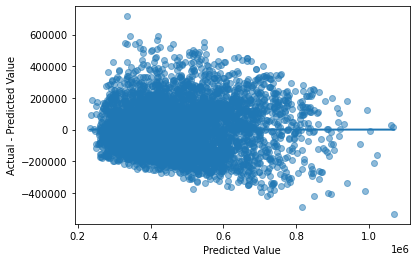

In [239]:
# Check for homoscedasticity
fig, ax = plt.subplots()
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

A "funnel" shape was still observed, a sign of heteroscedasticity.

The best solution to high vifs is to remove highly correlated predictors from the model. All the predictors with high vifs were dropped and a list, which contained only the features with vif less than 5, was created. The linear regression assumptions were then checked on the resulted model without outliers and high vifs.

In [240]:
# Prepare the data for modeling
best_features_final = ['sqft_living', 'sqft_lot', 'view']
X_train_final_final = X_train[best_features_final]
X_test_final_final = X_test[best_features_final]
# Fit the training data and score it on the test data
final_model_final = LinearRegression()
final_model_final.fit(X_train_final_final, y_train)
final_model_final.score(X_test_final_final, y_test)

0.39434111844199904

In [241]:
# Display the coefficients and intercept of the model
print(pd.Series(final_model_final.coef_, index = X_train_final_final.columns, name = 'Coefficient'))
print()
print("Intercept:", final_model_final.intercept_)

sqft_living      163.063931
sqft_lot          -0.066078
view           35332.793376
Name: Coefficient, dtype: float64

Intercept: 148475.5913131098


According to the model, the base price for a house in the King County is about 148,475.59. Then for every square footage of living space in the home, the price goes up by 163.06, and for every square footage of the lot, the price goes down by 0.06. Then finally, the quality of view from the house increases its price by 35,332.79 per numerical value of the feature. 

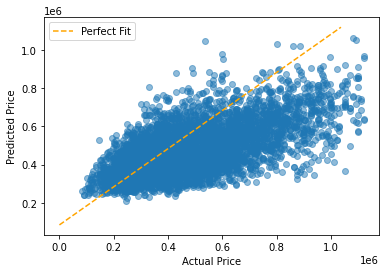

In [242]:
# Investigate linearity
preds = final_model_final.predict(X_test_final_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle = "--", color = 'orange', label = 'Perfect Fit')
ax.scatter(y_test, preds, alpha = 0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

The linearity assumption was fulfilled.

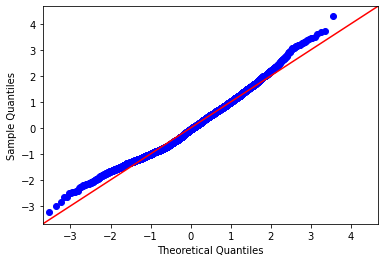

In [243]:
# Investigate normality
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True);

The normality assumption was followed.

In [244]:
# Investigate multicollinearity
vif = [variance_inflation_factor(X_train_final_final.values, i) for i in range (X_train_final_final.shape[1])]
pd.Series(vif, index=X_train_final_final.columns, name="Variance Inflation Factor")

sqft_living    1.243319
sqft_lot       1.163330
view           1.105180
Name: Variance Inflation Factor, dtype: float64

All the resulted values were less than 5, no signs of strong multicollinearity in the model.

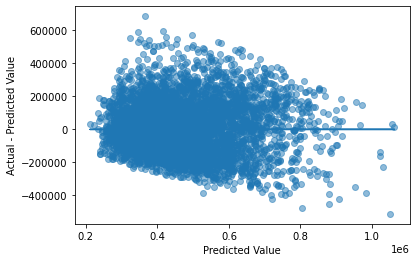

In [245]:
# Check for homoscedasticity
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Looked like because of residuals the rule of homoscedasticity was still violated.
***

## Model Evaluation

Based on the findings, we can conclude, that the resulted model is not strong enough, but with only three features, 39.4% of the model performance was recovered. We should not solely rely on the resulted coefficients, since they violate homoscedasticity assumption of linear regression. The coefficients should be used only for predictive purposes.
***

## Conclusions

The analysis of the King County House Sales dataset resulted in the development of a pricing algorithm that can help real estate agencies and homeowners to sell houses. Although, the XYZ Realty asked for an advice how the number of floors in homes increases or decreases the estimated values of those homes, the variable "floors" was not included in the final model, meaning that it is not a statistically significant feature. According to the analysis, the predictors of the target variable ("price") are square footage of living space in a house, square footage of the lot, and the quality of view from the house. Thus, the model illustrates that the base price for a house in the King County is about 148,475.59. Then for every square footage of living space in the home, the price goes up by 163.06, and for every square footage of the lot, the price goes down by 0.06. Then finally, the quality of view from the house increases its price by 35,332.79 per numerical value of the feature. 

The resulted model happened to be not strong enough and may be used only for predictive purposes. The R-square of the final test set (0.39) happened to be lower than the validation score of the baseline model (0.49). Also, the rule of homoscedasticity was violated in the final trial. All this can be explained by the following:
 -  the model can't perfectly fit all the datapoints in a linear regression model in real life, as in real models there are always outliers and residuals;
 -  the task is to find the relationship or "the best fit line" (not prefectly fit line) between the target and predictors;
 -  low R-square is not always a problem. R-square measures the scatter of the data around the regression lines. Higher variability around the regression line produces a lower R-square value;
 -  transformed categorical variable ("view") was used in the final model, however, sometimes the effect of categorical variable on the output can be misleading as the assigning of categorical variables is more subjective.
 
Further analysis of the dataset may be necessary, such as using only numerical features for the development of the pricing algorithm, without any transformed categorical variables in them.
***